<a href="https://colab.research.google.com/github/rlarjsdn4505/first-repository/blob/master/%EC%A0%95%EB%8B%A4%EB%B9%88%201%EB%B2%88%20%EA%B0%80%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NanumGothic.ttf to NanumGothic (1).ttf


In [ ]:
import os
font_path = '/content/NanumGothic.ttf'
print('exists:', os.path.exists(font_path), 'cwd:', os.getcwd())

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fm._load_fontmanager(try_read_cache=False)

fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
family_name = prop.get_name()
print('detected family:', family_name)
mpl.rcParams['font.family'] = family_name
mpl.rcParams['axes.unicode_minus'] = False

exists: True cwd: /content
detected family: NanumGothic


In [ ]:
import pandas as pd

# 파일 경로
file_path = '/content/drive/MyDrive/data/df.csv'
df = pd.read_csv(file_path)

df.head()

,주문ID,리뷰ID,리뷰점수,리뷰작성일,주문상태,구매일시,실제배송일,예상배송일,고객고유ID,고객우편번호앞자리,고객도시,고객주,주문개수,상품가격합계,배송비합계,상품카테고리,결제금액(주문합),총결제금액,배송지연일수,배송지연여부
0,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,58.90,13.29,문화/취미/엔터테인먼트,72.19,72.19,8,0
1,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,239.90,19.93,반려동물,259.83,259.83,2,0
2,000229ec398224ef6ca0657da4fc703e,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,199.00,17.87,가구/홈리빙/인테리어,216.87,216.87,13,0
3,00024acbcdf0a6daa1e931b038114c75,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,12.99,12.79,뷰티/헬스,25.78,25.78,5,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,940144190dcba6351888cafa43f3a3a5,5,2017-03-02 00:00:00,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,199.90,18.14,가구/홈리빙/인테리어,218.04,218.04,15,0


In [ ]:
print(df.columns)

Index(['주문ID', '리뷰ID', '리뷰점수', '리뷰작성일', '주문상태', '구매일시', '실제배송일', '예상배송일',
       '고객고유ID', '고객우편번호앞자리', '고객도시', '고객주', '주문개수', '상품가격합계', '배송비합계',
       '상품카테고리', '결제금액(주문합)', '총결제금액', '배송지연일수', '배송지연여부'],
      dtype='object')


In [ ]:
#예상배송일과 실제배송일을 datetime으로 변환
df['예상배송일'] = pd.to_datetime(df['예상배송일'])
df['실제배송일'] = pd.to_datetime(df['실제배송일'])

#  배송지연여부
df['배송지연일수_재계산'] = (df['실제배송일'] - df['예상배송일']).dt.days

#지연여부 재계산 (지연 1, 정시 0)
df['배송지연여부_재계산'] = df['배송지연일수_재계산'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df.head()

,주문ID,리뷰ID,리뷰점수,리뷰작성일,주문상태,구매일시,실제배송일,예상배송일,고객고유ID,고객우편번호앞자리,...,주문개수,상품가격합계,배송비합계,상품카테고리,결제금액(주문합),총결제금액,배송지연일수,배송지연여부,배송지연일수_재계산,배송지연여부_재계산
0,00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,...,1,58.90,13.29,문화/취미/엔터테인먼트,72.19,72.19,8,0,-9,0
1,00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,...,1,239.90,19.93,반려동물,259.83,259.83,2,0,-3,0
2,000229ec398224ef6ca0657da4fc703e,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,...,1,199.00,17.87,가구/홈리빙/인테리어,216.87,216.87,13,0,-14,0
3,00024acbcdf0a6daa1e931b038114c75,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,...,1,12.99,12.79,뷰티/헬스,25.78,25.78,5,0,-6,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,940144190dcba6351888cafa43f3a3a5,5,2017-03-02 00:00:00,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,...,1,199.90,18.14,가구/홈리빙/인테리어,218.04,218.04,15,0,-16,0


# 가설1 : 배송이 지연된 경우, 리뷰 점수는 낮을 것이다.

In [ ]:
df.groupby('배송지연여부_재계산')['리뷰점수'].mean()

,리뷰점수
배송지연여부_재계산,
0,4.318774
1,2.593641


1. 평균 비교 결과

**배송 지연이 없는 경우(0)**의 평균 리뷰 점수는 약 4.32점

**배송이 지연된 경우(1)**의 평균 리뷰 점수는 약 2.59점

→ 배송이 지연된 경우 리뷰 점수가 현저히 낮아지는 경향이 있음

In [ ]:
#전체 분포 요약
df.groupby('배송지연여부_재계산')['리뷰점수'].describe()

,count,mean,std,min,25%,50%,75%,max
배송지연여부_재계산,,,,,,,,
0,78805.0,4.318774,1.116171,1.0,4.0,5.0,5.0,5.0
1,3743.0,2.593641,1.646866,1.0,1.0,2.0,4.0,5.0


2. 전체 분포 요약 (describe 결과)

지연 없는 그룹(0) 리뷰 점수는 중앙값(50%)이 5점, 25%가 4점, 75%도 5점으로 비교적 높은 점수 분포

지연 그룹(1) 리뷰 점수는 중앙값이 2점, 25%가 1점, 75%가 4점으로 분포가 더 넓고 평균도 낮음

표준편차(std)가 지연 그룹에서 더 크므로 리뷰 점수의 편차도 더 큼

<Figure size 800x500 with 0 Axes>

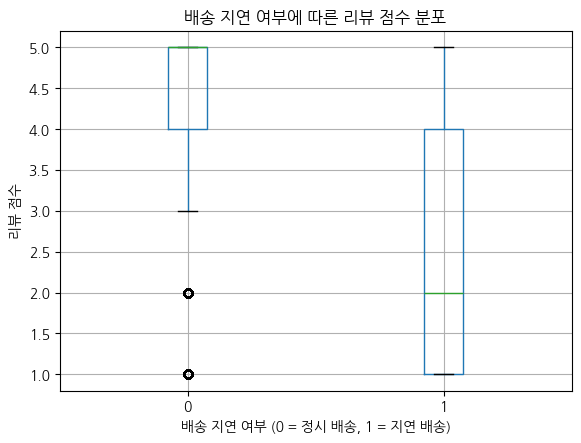

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 5))
df.boxplot(column='리뷰점수', by='배송지연여부_재계산')
plt.title('배송 지연 여부에 따른 리뷰 점수 분포')
plt.suptitle('')
plt.xlabel('배송 지연 여부 (0 = 정시 배송, 1 = 지연 배송)')
plt.ylabel('리뷰 점수')
plt.grid(True)
plt.show()

3. 박스플롯 시각화

배송 지연이 없는 경우 리뷰 점수가 주로 4~5점대에 몰려 있음

배송 지연이 있는 경우 리뷰 점수가 더 낮고, 분포도 넓어 불만족도가 더 크고 다양함

이상치의 경우 리뷰 점수 특성상 제거하지 말고, 분석에 반영

In [ ]:
from scipy.stats import shapiro

지연 = df[df['배송지연여부_재계산'] == 1]['리뷰점수']
정시 = df[df['배송지연여부_재계산'] == 0]['리뷰점수']

# Shapiro-Wilk 정규성 검정
stat_delay, p_delay = shapiro(지연)
print("배송 지연 그룹 - 통계량:", stat_delay, "p-value:", p_delay)

stat_ontime, p_ontime = shapiro(정시)
print("정시 배송 그룹 - 통계량:", stat_ontime, "p-value:", p_ontime)

배송 지연 그룹 - 통계량: 0.7851101256137307 p-value: 4.4589054920842554e-57
정시 배송 그룹 - 통계량: 0.6512324452279941 p-value: 4.941127853275742e-143


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 78805.
  res = hypotest_fun_out(*samples, **kwds)


p-value가 0.05보다 훨씬 작기 때문에 두 그룹 모두 정규성 가정을 기각

데이터가 정규분포를 따르지 않기 때문에 두 그룹 리뷰 점수 차이 검정은 비모수 검정(예: Mann-Whitney U test) 사용

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(지연, 정시, alternative='two-sided')  # 양측 검정
print("Mann-Whitney U 통계량:", stat)
print("p-value:", p)

Mann-Whitney U 통계량: 64791149.0
p-value: 0.0


p-value = 0.0 (매우 작음)
→ 배송 지연 그룹과 정시 배송 그룹 간 리뷰 점수 분포에 통계적으로 유의미한 차이가 있음.

결론:
배송 지연 여부에 따라 리뷰 점수 분포가 다르며,
이는 ‘배송이 지연되면 리뷰 점수가 낮다’는 가설을 통계적으로 뒷받침함.

**종합 분석**

배송이 지연되면 리뷰 점수가 평균적으로 크게 하락한다는 가설이 통계적으로 강하게 지지됨.

즉, 배송 지연은 고객 만족도(리뷰 점수)에 부정적인 영향을 미친다고 해석할 수 있음.

비즈니스 관점에서 배송 시간 관리는 고객 만족도 향상 및 부정 리뷰 감소를 위해 매우 중요함.

# 가설2 : 예상 배송일과 실제 배송일의 차이가 클수록 리뷰 점수는 낮을 것이다.

## 즉, 지연일수가 많아질수록 리뷰 점수가 낮을 것이다.

In [ ]:
bins = [-100, -1, 0, 3, 7, 100]
labels = ['빨리 도착', '지연 없음', '1~3일 지연', '4~7일 지연', '8일 이상 지연']
df['배송지연_구간'] = pd.cut(df['배송지연일수_재계산'], bins=bins, labels=labels)

df.groupby('배송지연_구간')['리뷰점수'].describe()

/tmp/ipython-input-2670401528.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('배송지연_구간')['리뷰점수'].describe()


,count,mean,std,min,25%,50%,75%,max
배송지연_구간,,,,,,,,
빨리 도착,77634.0,4.322681,1.114007,1.0,4.0,5.0,5.0,5.0
지연 없음,1171.0,4.059778,1.224332,1.0,3.0,5.0,5.0,5.0
1~3일 지연,1680.0,3.298214,1.584543,1.0,2.0,4.0,5.0,5.0
4~7일 지연,1568.0,2.117347,1.512004,1.0,1.0,1.0,3.0,5.0
8일 이상 지연,495.0,1.711111,1.253084,1.0,1.0,1.0,2.0,5.0


1. 전체 분포 요약 (describe 결과)

**빨리 도착 그룹**  
리뷰 평균 점수가 4.32점으로 가장 높고, 분산(std)도 1.11로 비교적 낮아서 고객 만족도가 높고 리뷰 점수 편차도 크지 않음.

**지연 없음 그룹**   
평균 4.06점으로 높은 편이지만, 25%는 3점으로 다소 낮은 점수도 있음.

**1~3일 지연 그룹**   
평균 점수는 3점대로 떨어졌으며, 표준편차가 1.58로 증가해 리뷰 점수 분포가 넓어짐을 보여줌.

**4~7일 지연 그룹**  
평균 2.11점으로 확 떨어지고, 25%와 50%가 1점, 75%가 3점으로 리뷰 점수가 전반적으로 낮아짐.

**8일 이상 지연 그룹**  
평균 1.71점으로 가장 낮고, 리뷰 점수 분포도 가장 편차가 크고(최대는 5점이긴 하지만) 매우 부정적인 리뷰가 많음을 의미.

**즉, 배송 지연 일수가 많아질수록 리뷰 점수가 낮아지는 뚜렷한 경향이 나타남**

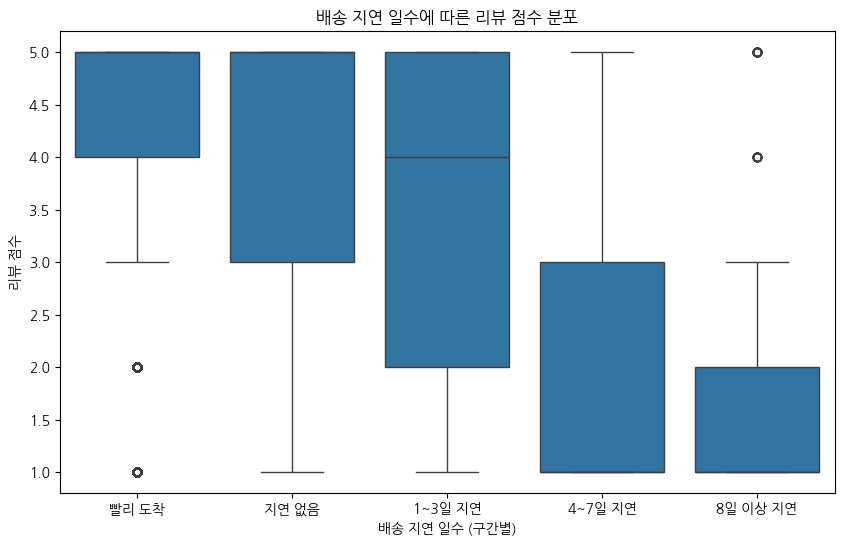

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='배송지연_구간', y='리뷰점수', data=df, order=[
    '빨리 도착', '지연 없음', '1~3일 지연', '4~7일 지연', '8일 이상 지연'
])
plt.xlabel('배송 지연 일수 (구간별)')
plt.ylabel('리뷰 점수')
plt.title('배송 지연 일수에 따른 리뷰 점수 분포')
plt.show()

**'빨리 도착' 구간 (예정보다 빨리 도착한 경우)**

리뷰 점수가 전반적으로 높게 형성되어 있음.
대부분 4점 이상, 중앙값은 5점에 가까움.
일부 낮은 점수(1점, 2점)도 존재하지만 전반적으로 긍정적 평가가 우세.

**'지연 없음' 구간 (정시 배송)**

리뷰 점수가 1점부터 5점까지 다양하게 분포됨.
중앙값은 약 4점, 전반적으로 무난한 평가.

큰 문제는 없지만, 일부 고객은 낮은 점수를 부여 → 배송 외 다른 요인(제품 품질, 서비스 등)이 리뷰에 영향을 준 것으로 추정 가능.

**'1~3일 지연' 구간 (경미한 지연)**

점수 분포가 더 넓어지고, 중앙값은 4점 이하로 소폭 하락.
배송 지연이 작더라도 일부 고객은 민감하게 반응하여 낮은 점수를 부여하는 경향.
그러나 여전히 긍정적 리뷰 비중이 큼.

**'4~7일 지연' 구간 (중간 수준 지연)**

중앙값이 3점 이하로 확연히 하락.
낮은 점수(1~2점)의 비중이 높아지고, 점수 분포도 넓음.
배송 지연이 실제로 고객 불만족을 유발함을 명확히 보여주는 구간.

**'8일 이상 지연' 구간 (장기 지연)**
리뷰 점수의 중앙값이 2점 이하로 매우 낮아짐.
극단적으로 낮은 점수(1점)가 많고, 일부는 아예 5점으로 준 경우도 있음 → 분포가 매우 넓고 극단적.

이 구간은 배송 지연이 리뷰 점수에 가장 부정적인 영향을 주는 것으로 분석됨.

**즉, 배송 지연 일수가 많을수록 리뷰 점수는 명확히 낮아지는 경향을 보임**

In [ ]:
# 배송지연_구간별로 리뷰점수 정규성 검정
for group in df['배송지연_구간'].unique():
    stat, p = shapiro(df[df['배송지연_구간'] == group]['리뷰점수'])
    print(f"[{group}] stat: {stat:.3f}, p-value: {p:.3f}")

[빨리 도착] stat: 0.649, p-value: 0.000
[지연 없음] stat: 0.753, p-value: 0.000
[1~3일 지연] stat: 0.821, p-value: 0.000
[4~7일 지연] stat: 0.715, p-value: 0.000
[8일 이상 지연] stat: 0.616, p-value: 0.000


p-value가 0.05보다 훨씬 작기 때문에 두 그룹 모두 정규성 가정을 기각

배송지연일수와 리뷰점수 모두 정규분포를 따르지 않기 때문에 두 그룹 리뷰 점수 차이 검정은 비모수 검정(예: Mann-Whitney U test) 사용

In [ ]:
from scipy.stats import mannwhitneyu
import itertools

groups = df['배송지연_구간'].unique()
alpha = 0.05
num_tests = len(groups) * (len(groups) - 1) // 2
bonferroni_alpha = alpha / num_tests

print(f"Bonferroni 보정 유의수준: {bonferroni_alpha:.4f}\n")

for group1, group2 in itertools.combinations(groups, 2):
    data1 = df[df['배송지연_구간'] == group1]['리뷰점수']
    data2 = df[df['배송지연_구간'] == group2]['리뷰점수']
    stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
    reject = "유의" if p < bonferroni_alpha else "비유의"
    print(f"{group1} vs {group2} => U 통계량: {stat:.3f}, p-value: {p:.4f} ({reject})")

Bonferroni 보정 유의수준: 0.0050

빨리 도착 vs 지연 없음 => U 통계량: 51423615.000, p-value: 0.0000 (유의)
빨리 도착 vs 1~3일 지연 => U 통계량: 89723880.500, p-value: 0.0000 (유의)
빨리 도착 vs 4~7일 지연 => U 통계량: 102703460.500, p-value: 0.0000 (유의)
빨리 도착 vs 8일 이상 지연 => U 통계량: 34503306.500, p-value: 0.0000 (유의)
지연 없음 vs 1~3일 지연 => U 통계량: 1246174.500, p-value: 0.0000 (유의)
지연 없음 vs 4~7일 지연 => U 통계량: 1492183.000, p-value: 0.0000 (유의)
지연 없음 vs 8일 이상 지연 => U 통계량: 506961.000, p-value: 0.0000 (유의)
1~3일 지연 vs 4~7일 지연 => U 통계량: 1832084.000, p-value: 0.0000 (유의)
1~3일 지연 vs 8일 이상 지연 => U 통계량: 634673.500, p-value: 0.0000 (유의)
4~7일 지연 vs 8일 이상 지연 => U 통계량: 441154.500, p-value: 0.0000 (유의)


p-value가 매우 작기 때문에 (일반적으로 0.05 기준 훨씬 작음),
귀무가설(두 그룹의 리뷰 점수 분포가 같다)을 기각
->  모든 그룹 간 리뷰 점수 차이가 통계적으로 유의미함

결론:
배송 지연 여부에 따라 리뷰 점수 분포가 다르며,
이는 ‘예상 배송일과 실제 배송일의 차이가 클수록 리뷰 점수는 낮을 것이다.’는 가설을 통계적으로 뒷받침함.




**종합 분석**

배송지연일수가 많아질수록 리뷰 점수가 평균적으로 유의미하게 낮아진다는 가설이 통계적으로 강하게 지지됨.

즉, 배송지연일수는 고객 만족도(리뷰 점수)에 부정적인 영향을 미치는 중요한 요인임을 확인할 수 있음.

# 가설 3 : 주문→배송까지 걸린 시간이 길수록 리뷰 점수는 낮을 것이다.

In [ ]:
df["구매일시"] = pd.to_datetime(df["구매일시"])
df["실제배송일"] = pd.to_datetime(df["실제배송일"])

# 배송 소요일 계산
df["배송소요일"] = (df["실제배송일"] - df["구매일시"]).dt.days

# 배송 소요일 구간 지정
bins = [0, 3, 7, 14, df["배송소요일"].max()]
labels = ['빠름 (0-3일)', '보통빠름 (4-7일)', '느림 (8-14일)', '매우 느림 (15일 이상)']

df["배송소요일_구간"] = pd.cut(df["배송소요일"], bins=bins, labels=labels, include_lowest=True, right=True)

In [ ]:
df.groupby("배송소요일_구간")["리뷰점수"].describe()

/tmp/ipython-input-868397538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("배송소요일_구간")["리뷰점수"].describe()


,count,mean,std,min,25%,50%,75%,max
배송소요일_구간,,,,,,,,
빠름 (0-3일),7800.0,4.480128,1.014633,1.0,4.0,5.0,5.0,5.0
보통빠름 (4-7일),22213.0,4.415207,1.050446,1.0,4.0,5.0,5.0,5.0
느림 (8-14일),31708.0,4.317459,1.117367,1.0,4.0,5.0,5.0,5.0
매우 느림 (15일 이상),20827.0,3.847458,1.425246,1.0,3.0,4.0,5.0,5.0


배송이 빠를수록 평균 리뷰 점수가 높고, 느릴수록 리뷰 점수가 낮아짐

특히 '매우 느림' 구간에서 평균 점수와 25% 분위수가 눈에 띄게 낮아 고객 만족도가 떨어지는 걸 알 수 있음

표준편차가 클수록 점수 분포가 더 넓다는 뜻이며, '매우 느림' 구간에서 점수 편차가 가장 큼

**즉, 이 통계는 배송 소요일과 고객 만족도(리뷰 점수) 사이에 부정적인 상관관계가 있음을 명확히 보여줌**

/tmp/ipython-input-3193863708.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mean = df.groupby("배송소요일_구간")["리뷰점수"].mean().reset_index()
/tmp/ipython-input-3193863708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_mean, x="배송소요일_구간", y="리뷰점수", palette="viridis")


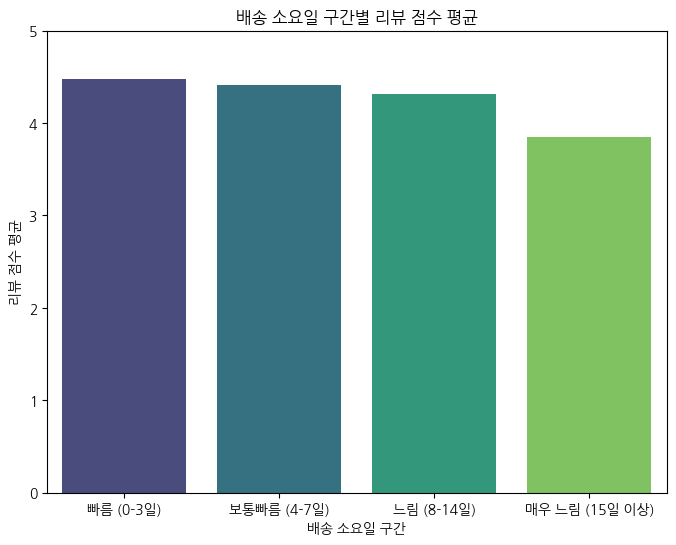

In [ ]:
grouped_mean = df.groupby("배송소요일_구간")["리뷰점수"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_mean, x="배송소요일_구간", y="리뷰점수", palette="viridis")
plt.title("배송 소요일 구간별 리뷰 점수 평균")
plt.xlabel("배송 소요일 구간")
plt.ylabel("리뷰 점수 평균")

plt.ylim(0, 5)

plt.show()

**0~3일(빠름)인 경우**
리뷰 점수가 가장 높음 (약 4.5점)

**4~7일(보통빠름)인 경우**
리뷰 점수가 약간 낮아지지만 여전히 높은 편. (약 4.4점)

**8~14일(느림)인 경우**
리뷰 점수가 더 떨어져 약 4.3점 정도

**15일 이상(매우 느림)인 경우**
리뷰 점수가 가장 낮아서 약 3.9점 정도입니다.

**즉, 배송이 빠를수록 리뷰 점수가 높고, 배송이 늦어질수록 리뷰 점수가 점차 낮아지는 경향이 뚜렷하게 나타남**


In [ ]:
for group in df['배송소요일_구간'].unique():
    stat, p = shapiro(df[df['배송소요일_구간'] == group]['리뷰점수'])
    print(f"{group}: stat={stat:.3f}, p={p:.3f}")

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22213.
  res = hypotest_fun_out(*samples, **kwds)


보통빠름 (4-7일): stat=0.609, p=0.000
매우 느림 (15일 이상): stat=0.758, p=0.000
느림 (8-14일): stat=0.651, p=0.000
빠름 (0-3일): stat=0.571, p=0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20827.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 31708.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7800.
  res = hypotest_fun_out(*samples, **kwds)


p-value가 0.05보다 훨씬 작기 때문에 두 그룹 모두 정규성 가정을 기각

배송지연일수와 리뷰점수 모두 정규분포를 따르지 않기 때문에 두 그룹 리뷰 점수 차이 검정은 비모수 검정 사용

In [ ]:
from scipy.stats import kruskal

# 배송소요일 구간별 리뷰점수 그룹 나누기
group_fast = df[df['배송소요일_구간'] == '빠름 (0-3일)']['리뷰점수']
group_normal_fast = df[df['배송소요일_구간'] == '보통빠름 (4-7일)']['리뷰점수']
group_slow = df[df['배송소요일_구간'] == '느림 (8-14일)']['리뷰점수']
group_very_slow = df[df['배송소요일_구간'] == '매우 느림 (15일 이상)']['리뷰점수']

# Kruskal-Wallis 검정 수행
stat, p = kruskal(group_fast, group_normal_fast, group_slow, group_very_slow)

print("Kruskal-Wallis H 통계량:", stat)
print("p-value:", p)

Kruskal-Wallis H 통계량: 2893.7881879439105
p-value: 0.0


p-value가 매우 작기 때문에 (일반적으로 0.05 기준 훨씬 작음),
귀무가설(각 그룹의 리뷰 점수 분포가 같다)을 기각

즉, 배송 소요일 구간별로 리뷰 점수 분포에 통계적으로 유의미한 차이가 있다고 할 수 있음
결론:
배송 소요일 구간에 따라 고객의 리뷰 점수 분포가 다르며,
이는 ‘배송이 지연될수록 고객 만족도(리뷰 점수)가 낮아진다’는 가설을 통계적으로 뒷받침함

**종합 분석**

배송지연일수가 많아질수록 리뷰 점수가 평균적으로 유의미하게 낮아진다는 가설이 통계적으로 강하게 지지됨

즉, 배송지연일수는 고객 만족도(리뷰 점수)에 부정적인 영향을 미치는 중요한 요인임을 확인할 수 있음

**따라서,  
비즈니스 관점에서 배송 지연, 배송지연일수, 배송소요일수를 최소화하는 것은 고객 만족도 향상과 부정 리뷰 감소에 매우 중요한 역할을 하며, 이를 통해 서비스 품질 개선과 고객 충성도 증진에 기여할 수 있음.**

In [ ]:
#변수간 상관관계 분석
cols = ['배송지연일수_재계산', '리뷰점수']
corr_matrix = df[cols].corr(method='spearman')
print("📌 Spearman 상관계수")
print(corr_matrix)

# 배송소요일_구간별 리뷰점수 평균
print(df.groupby('배송소요일_구간')['리뷰점수'].mean())

📌 Spearman 상관계수
            배송지연일수_재계산     리뷰점수
배송지연일수_재계산     1.00000 -0.13391
리뷰점수          -0.13391  1.00000
배송소요일_구간
빠름 (0-3일)         4.480128
보통빠름 (4-7일)       4.415207
느림 (8-14일)        4.317459
매우 느림 (15일 이상)    3.847458
Name: 리뷰점수, dtype: float64


/tmp/ipython-input-323532262.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('배송소요일_구간')['리뷰점수'].mean())


1. 배송지연일수_재계산과 리뷰점수 간의 Spearman 상관계수는 약 -0.134로 음의 상관관계를 보임

이는 배송 지연일수가 늘어날수록 고객 리뷰 점수가 다소 낮아지는 경향이 있음을 의미함 (부정적 영향)

상관계수 크기는 크지 않으나, 고객 리뷰 점수에 어느 정도 영향을 주고 있음을 시사함

2. 배송소요일 구간별 리뷰점수 평균 확인 시 배송이 빠를수록 평균 리뷰점수가 높으며, 배송 기간이 길어질수록 리뷰점수가 점차 감소함

특히 ‘매우 느림’ 구간의 리뷰 점수가 확연히 낮아 고객 만족도가 크게 떨어짐을 알 수 있음


**결론**
배송지연일수와 고객 리뷰 점수는 음의 상관관계를 가지고 있으며, 배송 지연이 길어질수록 고객 만족도가 낮아지는 경향이 나타남

배송소요일 구간별 리뷰 점수 평균도 배송이 느릴수록 고객 만족도가 감소하는 것을 뒷받침

따라서 배송 지연 최소화 및 배송 일정 준수가 고객 만족과 직결됨을 데이터로 확인 가능

In [ ]:
import statsmodels.api as sm

# 1. 종속변수(y)와 독립변수(X) 선택
y = df['리뷰점수']
X = df[['배송지연일수_재계산', '배송지연_구간']]

# 2. 범주형 변수 더미변수 변환
X = pd.get_dummies(X, drop_first=True)

# 3. bool 타입 -> int 타입 변환
X = X.astype(int)

# 4. 상수항 추가
X = sm.add_constant(X)

# 5. 결측치 확인 및 제거
df_model = pd.concat([X, y], axis=1).dropna()
X_clean = df_model.drop(columns=['리뷰점수'])
y_clean = df_model['리뷰점수']

# 6. 회귀모델 적합
model = sm.OLS(y_clean, X_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1927.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        06:03:17   Log-Likelihood:            -1.2766e+05
No. Observations:               82548   AIC:                         2.553e+05
Df Residuals:                   82542   BIC:                         2.554e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2321      0.009  

1. 모델 설명

종속변수: 리뷰점수
독립변수: 배송지연일수_재계산, 배송지연_구간(범주형 변수 더미변수)
관측치 수: 82,548개
R-squared: 0.105 (설명력 10.5%)
F-statistic p-value: 0.00 (모델 유의미)

2. 회귀계수 해석
const (상수항):
배송 지연 구간이 없을 때, 고객의 평균 리뷰 점수는 약 4.23점임을 의미

배송지연일수_재계산:
배송 지연일수가 하루 늘어날 때마다 리뷰 점수가 약 0.0069점 감소. 이는 통계적으로 유의미한 부정적 영향

배송지연_구간별 영향:
지연 없음 구간에 비해 배송 지연이 발생하면 리뷰 점수가 하락
1~3일 지연: 리뷰 점수가 약 0.92점 감소
4~7일 지연: 리뷰 점수가 약 2.08점 감소
8일 이상 지연: 리뷰 점수가 약 2.46점 감소
배송 지연 기간이 길어질수록 고객 만족도(리뷰 점수)가 크게 떨어지는 것으로 나타남

3. 통계적 유의성
모든 변수의 p-value가 0.05보다 훨씬 작아 통계적으로 유의함.
t값이 절대값으로 매우 큼 (예: 배송지연일수 -10.669, 4~7일 지연 -66.139 등)
모델 전체 F-test도 유의미하여 모델 적합도가 있음

4. 종합 해석

배송지연일수가 많아질수록 리뷰점수가 낮아지는 부정적 영향이 있음.
배송 지연 구간이 길어질수록 고객 만족도(리뷰점수)는 점점 더 크게 떨어짐.

이는 배송 지연이 고객 만족도에 부정적인 영향을 미치는 중요한 요인임을 보여줌.

다만 모델의 설명력(R-squared)이 10.5%로 높지 않아, 리뷰점수는 배송지연 외에도 다양한 요인에 의해 영향을 받음을 의미.